In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load data
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
df_train.shape

(188318, 132)

In [5]:
# Features
x = df_train.iloc[:, :-1]
x.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,A,B,A,B,A,A,A,A,B,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,2,A,B,A,A,A,A,A,A,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,5,A,B,A,A,B,A,A,A,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,10,B,B,A,B,A,A,A,A,B,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,11,A,B,A,B,A,A,A,A,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [8]:
# Targets
y = df_train.iloc[:, -1]

In [14]:
# Check if we have null values in training data
df_train.isnull().sum().sum()

0

In [18]:
cat_col = df_train.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col)))
cat_col[:5]

Number of Categorical columns: 116


['cat1', 'cat2', 'cat3', 'cat4', 'cat5']

In [19]:
cont_col = df_train.select_dtypes(include = ['float64', 'int64', 'int32']).columns.tolist()
print('Number of numeric columns: {}'.format(len(cont_col)))
cont_col[:5]

Number of numeric columns: 16


['id', 'cont1', 'cont2', 'cont3', 'cont4']

### Find categorical features with N vaiable in training dataset

In [99]:
# We need to do the same thing for test dataset

In [89]:
# List of unique categories in each column
cat_list = []
for column in cat_col:
    cat_list.append(len(df_train[column].unique().tolist()))

In [90]:
from collections import Counter
Counter(cat_list)

Counter({2: 72,
         3: 4,
         4: 12,
         8: 3,
         7: 4,
         5: 3,
         16: 2,
         15: 1,
         19: 2,
         9: 1,
         13: 1,
         17: 2,
         20: 2,
         11: 1,
         84: 1,
         131: 1,
         51: 1,
         61: 1,
         23: 1,
         326: 1})

In [91]:
# Distinct categories in the training dataset
A = list(Counter(cat_list).keys())
A

[2, 3, 4, 8, 7, 5, 16, 15, 19, 9, 13, 17, 20, 11, 84, 131, 51, 61, 23, 326]

In [92]:
# Number of columns for a given number of category 
B = list(Counter(cat_list).values())
B

[72, 4, 12, 3, 4, 3, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1]

<IPython.core.display.Javascript object>


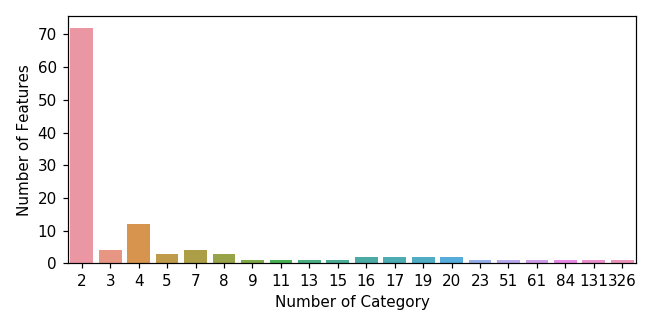

In [88]:
%matplotlib notebook
plt.figure(figsize=(6,3))
sns.barplot(A, B)
plt.xlabel('Number of Category')
plt.ylabel('Number of Features')
plt.tight_layout()

In [93]:
# We see that we have 70 columns with binary category

In [94]:
# Find categorical features with N vaiable in training dataset
def col_type_list(dataset, col_type_list):
    col_list = dataset.select_dtypes(include = col_type_list).columns
    #print(dataset.select_dtypes(include = col_type_list).shape)
    return col_list


def cat_uniq_list(dataset, label, N):
    
    column_obj = col_type_list(dataset, ['object', 'bool'])
    cat_uniq = dataset[column_obj].nunique()
    name = 'cat_{}_feat_'.format(N) + label
    uniq_list = cat_uniq[cat_uniq == N].index
    return{name: uniq_list}

dic = {}        
for i in A[:5]:       
    dic.update(cat_uniq_list(df_train, 'train', i))
    #dic.update(cat_uniq_list(df_test, 'test', i))
dic

{'cat_2_feat_train': Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
        'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17',
        'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
        'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33',
        'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41',
        'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
        'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
        'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65',
        'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72'],
       dtype='object'),
 'cat_3_feat_train': Index(['cat73', 'cat74', 'cat75', 'cat76'], dtype='object'),
 'cat_4_feat_train': Index(['cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
        'cat85', 'cat86', 'cat87', 'cat88'],
       dtype='obj

In [95]:
# Encode features with two variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_2 = LabelEncoder()

In [96]:
# Those columns with two variables
df_train[dic['cat_2_feat_train']].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
0,A,B,A,B,A,A,A,A,B,A,...,A,A,A,A,A,A,A,A,A,A
1,A,B,A,A,A,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,A
2,A,B,A,A,B,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,A
3,B,B,A,B,A,A,A,A,B,A,...,A,A,A,A,A,A,A,A,A,A
4,A,B,A,B,A,A,A,A,B,B,...,A,A,A,A,A,A,A,A,A,B


In [97]:
#Atuencoding for 2-variable categorical features in training dataset
for i in dic['cat_2_feat_train']:
    df_train[i] = labelencoder_X_2.fit_transform(df_train[i])
df_train[dic['cat_2_feat_train']].head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [102]:
# Check if number of categorical features is reduced by 72 from 116:
cat_col_updated = df_train.select_dtypes(include = ['object', 'bool']).columns.tolist()
print('Number of Categorical columns: {}'.format(len(cat_col_updated)))

Number of Categorical columns: 44


<IPython.core.display.Javascript object>


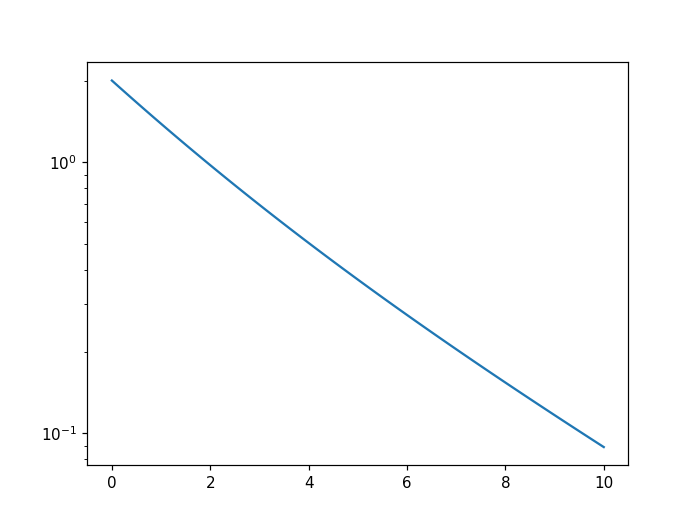

[]

In [107]:
%matplotlib notebook
f = [np.exp(-i/2) + np.exp(-i/4) for i in np.linspace(0, 10, 100)]
plt.plot(np.linspace(0, 10, 100), f)
#plt.semilogx()
plt.semilogy()